In [55]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [56]:
user = 'postgres'
password = 'invizimals'
host = 'localhost'
port = 5432
database = 'dvdrental'

In [57]:
def get_connection():
    return create_engine(
        url=f"postgresql://{user}:{password}@{host}:{port}/{database}"
    )

def getData(order):
    try:
        return pd.read_sql_query(str('') + order + str(''),con=engine)
    except:
        print("Invalid Query")
        return None

In [58]:
try:
    engine = get_connection()
    print(
        f"Connection to the {host} for user {user} created successfully.")
except Exception as ex:
    print("Connection could not be made due to the following error: \n", ex)

Connection to the localhost for user postgres created successfully.


# Questions:

# 1. Who are the top 5 customers and how many rentals did they make?

In [59]:
df = getData('''select customer.customer_id, concat(customer.first_name, ' ', customer.last_name) as full_name, customer.last_name, 
count(rental.rental_id) as rental_count from customer
inner join rental
on customer.customer_id = rental.customer_id
group by customer.customer_id
order by rental_count desc
limit 5;''')
df.head()

,customer_id,full_name,last_name,rental_count
0,148,Eleanor Hunt,Hunt,46
1,526,Karl Seal,Seal,45
2,236,Marcia Dean,Dean,42
3,144,Clara Shaw,Shaw,42
4,75,Tammy Sanders,Sanders,41


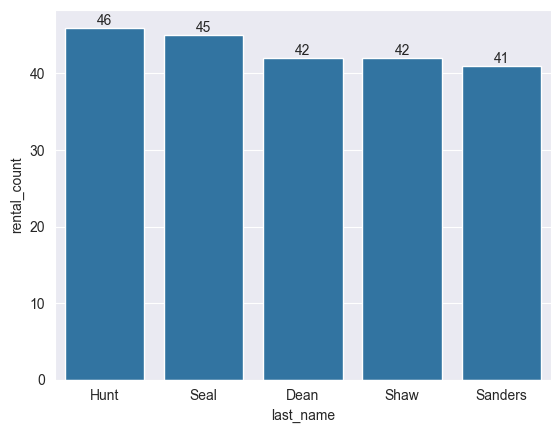

In [60]:
ax = sns.barplot(df, x='last_name', y='rental_count')
ax.bar_label(ax.containers[0], fontsize=10);

The top 10 customers are:
- Eleanor Hunt 46
- Karl Seal 45
- Marcia Dean 42
- Clara Shaw 42
- Tammy Sanders 41	

# 2. What countries do most of our sales come from?

In [61]:
df = getData('''select country.country, count(customer.customer_id) as country_count from country
inner join city
on city.country_id = country.country_id
inner join address
on address.city_id = city.city_id
inner join customer
on address.address_id = customer.address_id
group by country.country
order by country_count desc
limit 5;''')

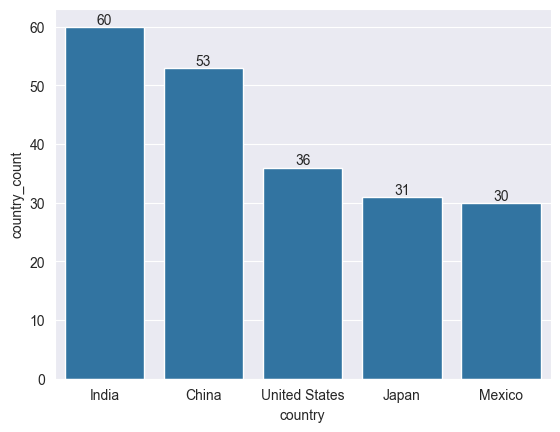

In [62]:
ax = sns.barplot(df, x='country', y='country_count')
ax.bar_label(ax.containers[0], fontsize=10);

The sales comes mainly from:
- India
- China
- United States
- Japan
- Mexico

# 3. What were the largest payments and who made them?

In [63]:
df = getData('''select amount, customer.last_name, concat(customer.first_name, ' ', customer.last_name) as full_name from payment
inner join customer
on customer.customer_id = payment.customer_id
order by amount desc
limit 8;''')
df.head(8)

,amount,last_name,full_name
0,11.99,Sims,Vanessa Sims
1,11.99,Roush,Terrance Roush
2,11.99,Schmidt,Rosemary Schmidt
3,11.99,Gibson,Victoria Gibson
4,11.99,Gilbert,Tanya Gilbert
5,11.99,Arsenault,Kent Arsenault
6,11.99,Barfield,Nicholas Barfield
7,11.99,Jackson,Karen Jackson


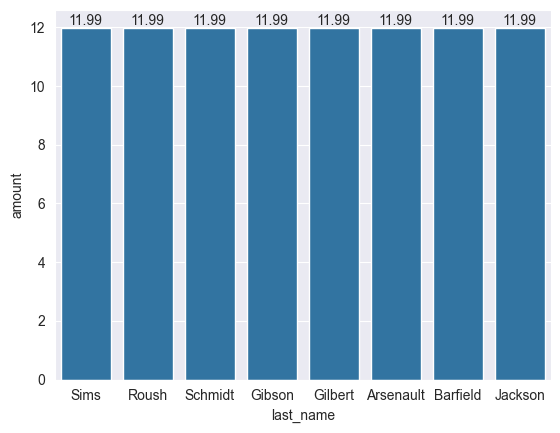

In [64]:
ax = sns.barplot(df, x='last_name', y='amount')
ax.bar_label(ax.containers[0], fontsize=10);

The largest payments were of 11.99 and these were made by:
- Vanessa Sims
- Terrance Roush
- Rosemary Schmidt
- Victoria Gibson
- Tanya Gilbert
- Kent Arsenault
- Nicholas Barfield
- Karen Jackson

# 4. In what languages are our movies available?

In [65]:
df = getData('''select language.name, count(language.name) as language_count from language
inner join film
on film.language_id = language.language_id
group by language.language_id;''')

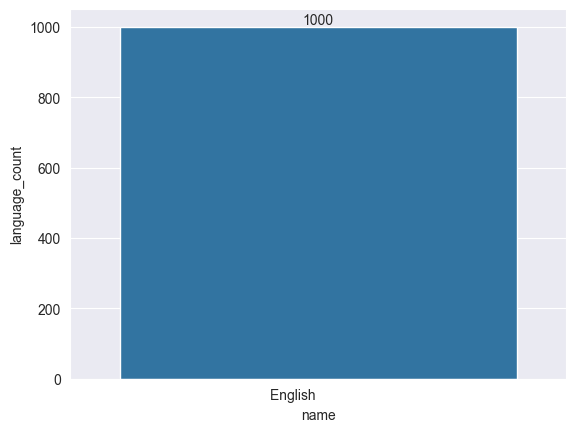

In [66]:
ax = sns.barplot(df, x='name', y='language_count')
ax.bar_label(ax.containers[0], fontsize=10);

All the movies were made in English.

# 5. What is the maximum length of the films?

In [67]:
df = getData('''select title, length from film
order by length desc
limit 3;''')

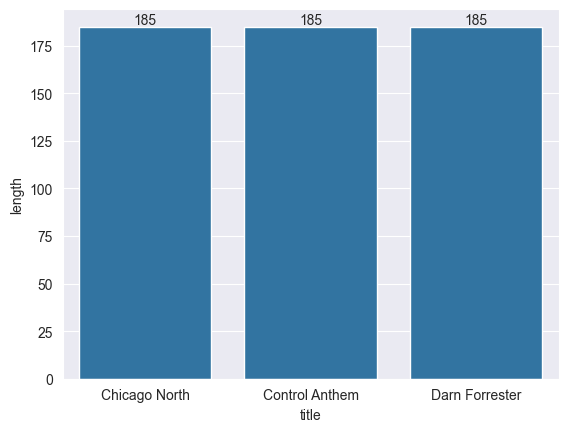

In [68]:
ax = sns.barplot(df, x='title', y='length')
ax.bar_label(ax.containers[0], fontsize=10);

The maximum length of a movie was of 185.

# 6. What is the minimum length of the films?

In [69]:
df = getData('''select title, length from film
order by length
limit 3;''')

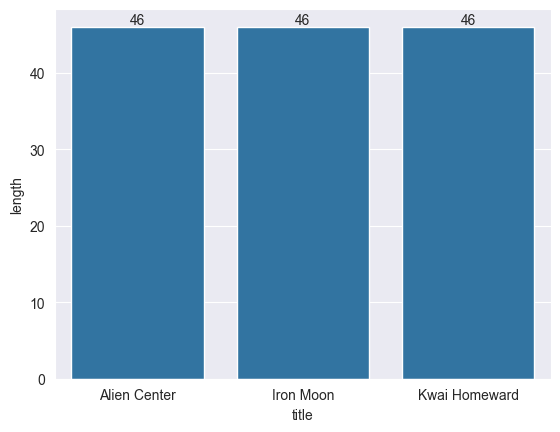

In [70]:
ax = sns.barplot(df, x='title', y='length')
ax.bar_label(ax.containers[0], fontsize=10);

The minimum length of a film is 46.

# 7. What is the average length of the films?

In [71]:
df = getData('''select length from film
order by length;''')
mean = getData('''select avg(length) from film;''').iloc[0,0]

In [72]:
print(mean)

115.272


<Axes: xlabel='length'>

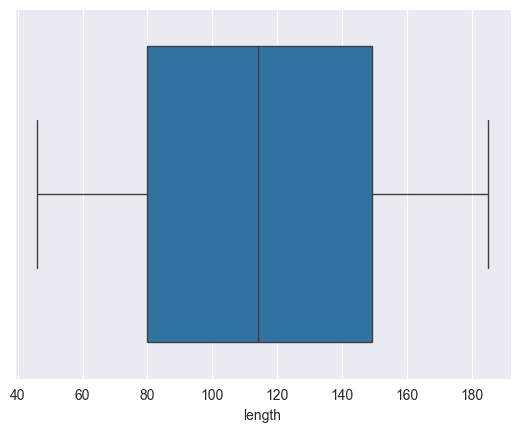

In [73]:
sns.boxplot(x=df["length"])

The average length of the movies is 115.27.

# 8. What is the maximum replacement cost of a film?

In [74]:
df = getData('''select replacement_cost, title from film
order by replacement_cost desc
limit 3;''')

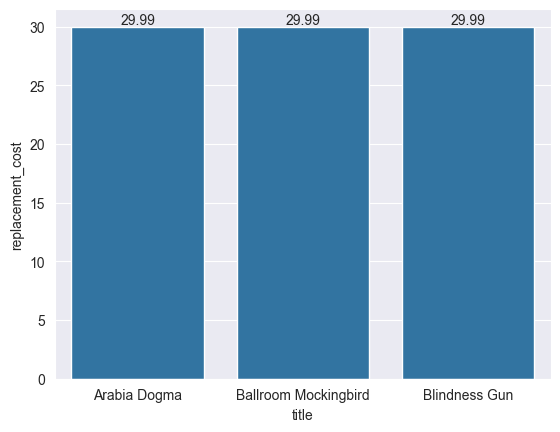

In [75]:
ax = sns.barplot(df, x='title', y='replacement_cost')
ax.bar_label(ax.containers[0], fontsize=10);

The maximum replacement cost of a film is 29.99.

# 9. What is the minimum replacement cost of a film?

In [76]:
df = getData('''select replacement_cost, title from film
order by replacement_cost
limit 3;''')

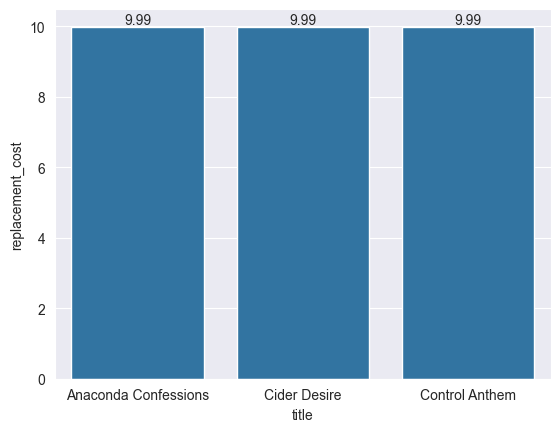

In [77]:
ax = sns.barplot(df, x='title', y='replacement_cost')
ax.bar_label(ax.containers[0], fontsize=10);

The minimum replacement cost of a film is 9.99.

# 10. What is the average replacement cost of a film?

In [78]:
df = getData('''select replacement_cost from film;''')
mean_l = getData('''select avg(replacement_cost) from film;''').iloc[0,0]

In [79]:
print(mean_l)

19.984


<Axes: xlabel='replacement_cost'>

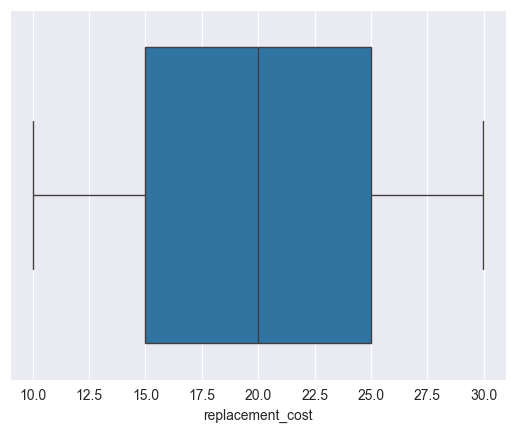

In [80]:
sns.boxplot(x=df["replacement_cost"])

The average replacement cost of a film is 19.984.

# 11. What is the most common rating of the films?

In [81]:
df = getData('''select count(rating) as rating_count, rating from film
group by rating
order by rating_count desc;''')
max_r = df.iloc[0,1]

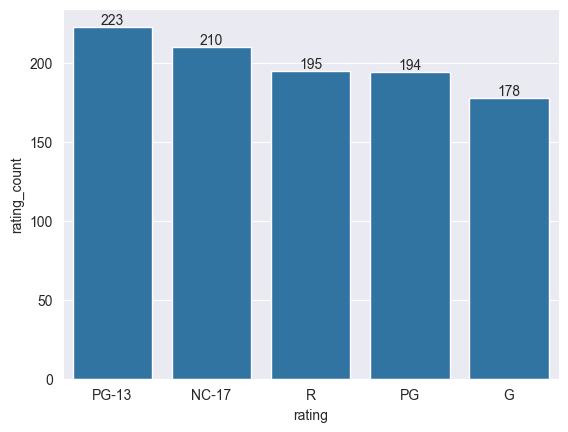

In [82]:
ax = sns.barplot(df, x='rating', y='rating_count')
ax.bar_label(ax.containers[0], fontsize=10);

The most common rating of the films is PG-13.

# 12. What is the least common rating of the films?

In [83]:
df = getData('''select count(rating) as rating_count, rating from film
group by rating
order by rating_count;''')
min_r = df.iloc[0,1]

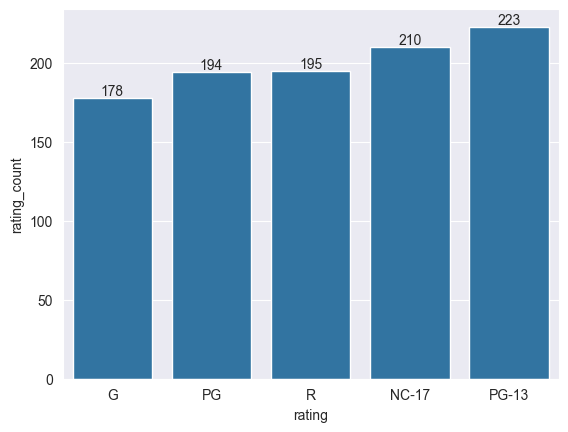

In [84]:
ax = sns.barplot(df, x='rating', y='rating_count')
ax.bar_label(ax.containers[0], fontsize=10);

The least common rating of the films is G.

# 13. What is the most common category of the films?

In [85]:
df = getData('''select category.name, count(category.name) as category_count from category
inner join film_category
on film_category.category_id = category.category_id
inner join film
on film_category.film_id = film.film_id
group by category.name
order by category_count desc
limit 5;''')

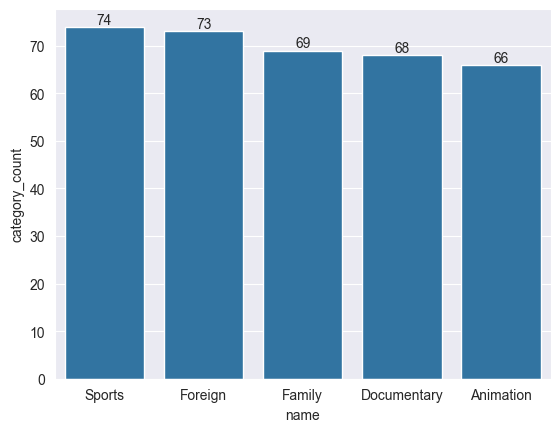

In [86]:
ax = sns.barplot(df, x='name', y='category_count')
ax.bar_label(ax.containers[0], fontsize=10);

The most common category of the films is Sports.

# 14. What is the least common category of the films?

In [87]:
df = getData('''select category.name, count(category.name) as category_count from category
inner join film_category
on film_category.category_id = category.category_id
inner join film
on film_category.film_id = film.film_id
group by category.name
order by category_count
limit 5;''')

[Text(0, 0, '51'),
 Text(0, 0, '56'),
 Text(0, 0, '57'),
 Text(0, 0, '57'),
 Text(0, 0, '58')]

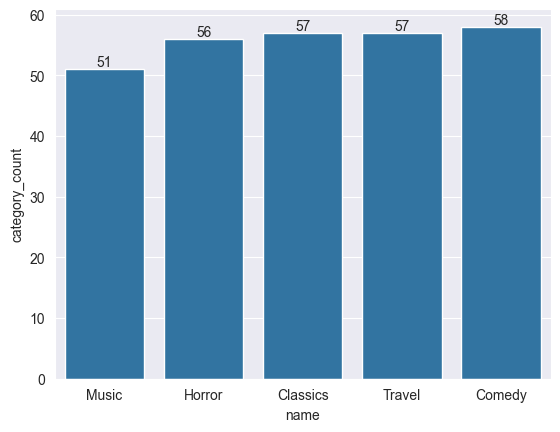

In [88]:
ax = sns.barplot(df, x='name', y='category_count')
ax.bar_label(ax.containers[0], fontsize=10)

The least common category of the films is Music.

# 15. Who is the most common actor in the films?

In [89]:
df = getData('''select actor.last_name, count(actor.last_name) as actor_count from actor
inner join film_actor
on film_actor.actor_id = actor.actor_id
inner join film
on film.film_id = film_actor.actor_id
group by actor.last_name
order by actor_count desc
limit 5;''')

[Text(0, 0, '134'),
 Text(0, 0, '124'),
 Text(0, 0, '104'),
 Text(0, 0, '96'),
 Text(0, 0, '95')]

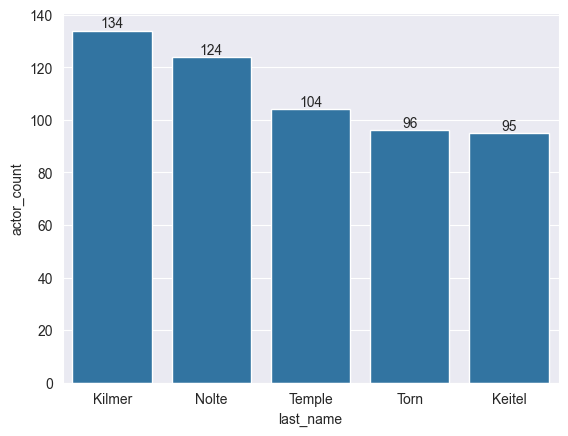

In [90]:
ax = sns.barplot(df, x='last_name', y='actor_count')
ax.bar_label(ax.containers[0], fontsize=10)

The most common actor in the films is Kilmer.

# 16. Who is the least common actor in the films?

In [91]:
df = getData('''select actor.last_name, count(actor.last_name) as actor_count from actor
inner join film_actor
on film_actor.actor_id = actor.actor_id
inner join film
on film.film_id = film_actor.actor_id
group by actor.last_name
order by actor_count
limit 5;''')

[Text(0, 0, '18'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '19'),
 Text(0, 0, '20')]

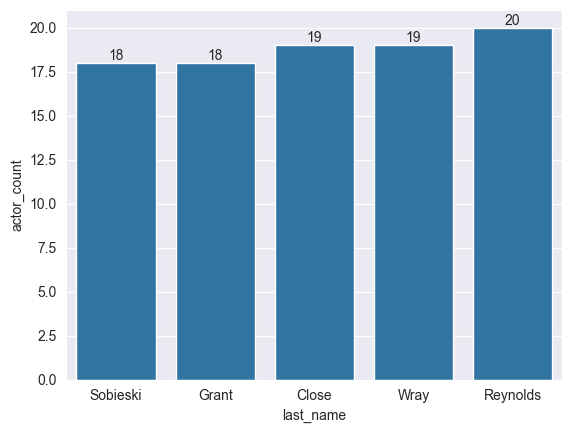

In [92]:
ax = sns.barplot(df, x='last_name', y='actor_count')
ax.bar_label(ax.containers[0], fontsize=10)

The least common actor in the films is Sobieski and Grant.

# 17. Which staff employee received the most payments?

In [93]:
df = getData('''select staff.last_name, count(payment.payment_id) as payment_count from staff
inner join payment
on payment.staff_id = staff.staff_id
group by staff.last_name
order by payment_count desc;''')
emp_m = df.iloc[0,0]

In [94]:
print(emp_m)

Stephens


[Text(0, 0, '7304'), Text(0, 0, '7292')]

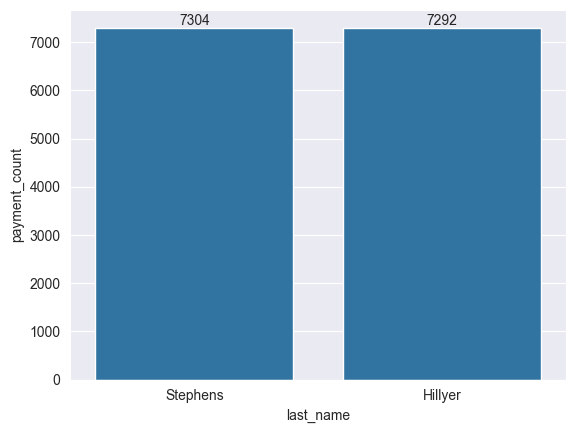

In [95]:
ax = sns.barplot(df, x='last_name', y='payment_count')
ax.bar_label(ax.containers[0], fontsize=10)

The staff employee with received most payments is Stephens.

# 18. In which city is located this employee?

In [96]:
df = getData('''
select staff.last_name, city.city, concat(staff.first_name, ' ', staff.last_name) as full_name from staff
inner join store
on store.store_id = staff.store_id
inner join address
on address.address_id = store.address_id
inner join city
on city.city_id = address.city_id;''')

In [97]:
df.head()

,last_name,city,full_name
0,Hillyer,Lethbridge,Mike Hillyer
1,Stephens,Woodridge,Jon Stephens


Stephens is located in Woodridge.

# 19. Which staff employee received the least payments?

In [98]:
df = getData('''select staff.last_name, count(payment.payment_id) as payment_count from staff
inner join payment
on payment.staff_id = staff.staff_id
group by staff.last_name
order by payment_count;''')
emp_m = df.iloc[0,0]

In [99]:
print(emp_m)

Hillyer


[Text(0, 0, '7292'), Text(0, 0, '7304')]

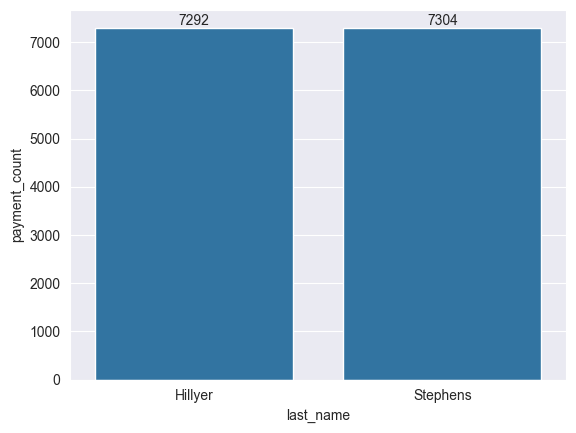

In [100]:
ax = sns.barplot(df, x='last_name', y='payment_count')
ax.bar_label(ax.containers[0], fontsize=10)

The staff employee with received least payments is Hillyer.

# 20. In which city is located this employee?

In [101]:
df = getData('''
select staff.last_name, city.city, concat(staff.first_name, ' ', staff.last_name) as full_name from staff
inner join store
on store.store_id = staff.store_id
inner join address
on address.address_id = store.address_id
inner join city
on city.city_id = address.city_id;''')

In [102]:
df.head()

,last_name,city,full_name
0,Hillyer,Lethbridge,Mike Hillyer
1,Stephens,Woodridge,Jon Stephens


Hillyer is located in Lethbridge.